In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Important libraries used
# Basic libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For statistical tests
import scipy.stats as stats

# For handling multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier

# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score

# for preprocessing and splitting of the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tremorpred005.xlsx')

In [ ]:
df=data.copy()

In [ ]:
df.head()

,mean_velocity,std_velocity,tremor_frequency,amplitude,target
0,0.012834,0.436580,63,1.483,1
1,0.011961,0.384537,63,1.537,1
2,0.012198,0.454374,63,1.489,1
3,0.012605,0.382686,63,1.395,1
4,-0.002908,0.443964,62,1.580,1


In [ ]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_velocity     792 non-null    float64
 1   std_velocity      792 non-null    float64
 2   tremor_frequency  792 non-null    int64  
 3   amplitude         792 non-null    float64
 4   target            792 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 31.1 KB


In [ ]:
# Checking for duplicate rows
df.duplicated().value_counts()
# Data has no duplicate rows

False    396
True     396
dtype: int64

In [ ]:
# Checking for missing values
df.isnull().sum()
# Data has no missing values

mean_velocity       0
std_velocity        0
tremor_frequency    0
amplitude           0
target              0
dtype: int64

In [ ]:
# Splitting the data into x and y
x=df.drop(columns='target')
y=df.target

In [ ]:
# Splitting the data into x and y
x=df.drop(columns='target')
y=df.target

In [ ]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)


In [ ]:
# Shape of the train and test sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((633, 4), (633,), (159, 4), (159,))

In [ ]:
# Before proceeding to our modelling we will create a function to check th evaluation scores

def evaluation(y_test,y_pred):

    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()

In [ ]:
rf=RandomForestClassifier()

In [ ]:
# Fitting and predicting
y_pred=rf.fit(x_train,y_train).predict(x_test)

Accuracy Score: 0.8867924528301887
f1_score: 0.8831168831168831
Precision: 0.918918918918919
Recall: 0.85
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        79
           1       0.92      0.85      0.88        80

    accuracy                           0.89       159
   macro avg       0.89      0.89      0.89       159
weighted avg       0.89      0.89      0.89       159



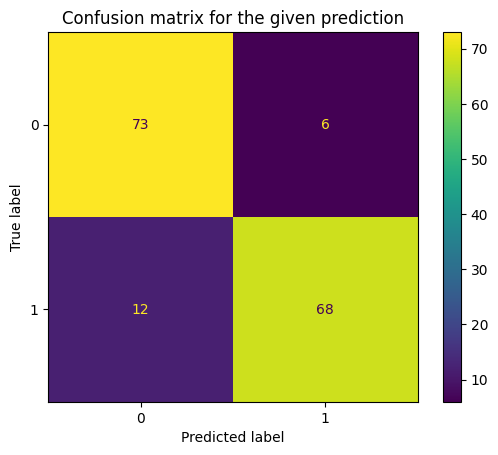

In [ ]:
# evaluation of the model
evaluation(y_test,y_pred)

In [ ]:
# Get the feature importance scores
importances = rf.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importances = dict(zip(x.columns, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top N features with the highest scores
n = 10
for feature, importance in sorted_features[:n]:
    print(f"{feature}: {importance:.4f}")

mean_velocity: 0.3047
std_velocity: 0.2597
amplitude: 0.2373
tremor_frequency: 0.1983


Accuracy Score: 0.710691823899371
f1_score: 0.6891891891891891
Precision: 0.75
Recall: 0.6375
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        79
           1       0.75      0.64      0.69        80

    accuracy                           0.71       159
   macro avg       0.72      0.71      0.71       159
weighted avg       0.72      0.71      0.71       159



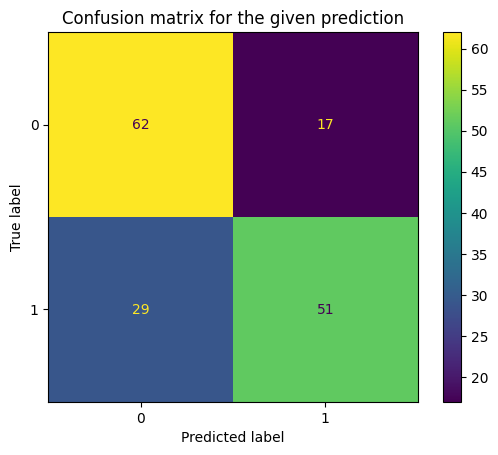

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(x_test)

evaluation(y_test,y_pred)

Accuracy Score: 0.610062893081761
f1_score: 0.36734693877551017
Precision: 1.0
Recall: 0.225
Classification report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        79
           1       1.00      0.23      0.37        80

    accuracy                           0.61       159
   macro avg       0.78      0.61      0.54       159
weighted avg       0.78      0.61      0.54       159



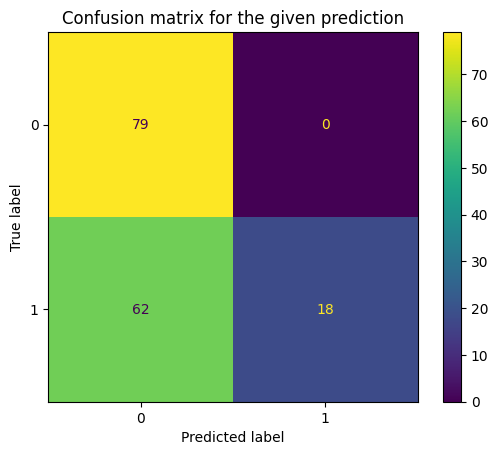

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm = SVC(kernel='rbf')

# Train the SVM model
svm.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(x_test)

evaluation(y_test,y_pred)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset with missing values
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tremorpred005.xlsx')

# Split the dataset into input features and target variable
X = df.drop('target', axis=1)
y = df['target']


# Create a SimpleImputer object to replace missing values with mean or median
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the input features
imputer.fit(X)

# Transform the input features by replacing missing values with mean or median
X_imputed = imputer.transform(X)

# Train a machine learning model on the imputed dataset
model = RandomForestClassifier()
model.fit(X_imputed, y)

RandomForestClassifier()

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/tremorpred005.pkl')

['/content/drive/MyDrive/Colab Notebooks/tremorpred005.pkl']

In [ ]:
import pickle

# Train and fit the Random Forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Save the trained model to a pickle file
with open('/content/drive/MyDrive/Colab Notebooks/tremorpred005.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import pickle

# Load the trained Random Forest model from the pickle file
with open('/content/drive/MyDrive/Colab Notebooks/tremorpred005.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
import pandas as pd

# Create a DataFrame with the new input data
new_data = pd.DataFrame({
    'mean_velocity': [0.00338],
    'std_velocity': [0.0887],
    'tremor_frequency': [42],
    'amplitude': [361.25]
})


In [ ]:
# Use the loaded model to make predictions
predictions = model.predict(new_data)

# Convert the predictions to human-readable labels
labels = ['Non-Parkinson', 'Parkinson']
predicted_labels = [labels[prediction] for prediction in predictions]

# Print the predicted labels
print('Predicted Labels:', predicted_labels)


Predicted Labels: ['Parkinson']
